In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a file path
census_data = pd.read_csv("Resources/census_data_clean_monthly_owner_costs_14_22.csv")

# Read in the data. 
census_data.head()

,Owner_Occupied_Units,Owner_White_alone,Owner_Black_African_American_alone,Owner_American_Indian_Alaska_Native_alone,Owner_Asian_alone,Owner_Native_Hawaiian_Other_Pacific_Islander_alone,Owner_Some_other_race_alone,Owner_Two_or_more_races,Owner_White_no_Hispanic_or_Latino,Owner_Hispanic_Latino,...,Black_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_Pacific_Islander,Other_Race,Two_More_Races,Count_Inds_Income_Past_12_Mos_<_Pov_Level,state,Zip_code,year
0,39,39,0,0,0,0,0,0,39,0,...,0,0,0,0,0,0,12,38.0,58524,2019
1,206,0,0,206,0,0,0,0,0,22,...,0,434,0,0,0,17,1271,4.0,85911,2014
2,59,0,0,59,0,0,0,0,0,0,...,0,75,0,0,0,0,75,NaN,99561,2020
3,166,79,71,0,0,0,0,16,79,0,...,84,0,0,0,0,16,44,13.0,39836,2014
4,111,104,0,0,0,0,0,7,96,8,...,0,0,0,0,0,7,31,22.0,71425,2014


In [3]:
# Median monthly owner cost over time
median_owner_costs_by_year = census_data.groupby('year')['Median_Monthly_Owner_Costs'].median()
median_owner_costs_by_year

year
2014    1183.0
2019    1233.5
2020    1259.0
2021    1322.0
2022    1426.0
Name: Median_Monthly_Owner_Costs, dtype: float64

R-squared: 0.7095


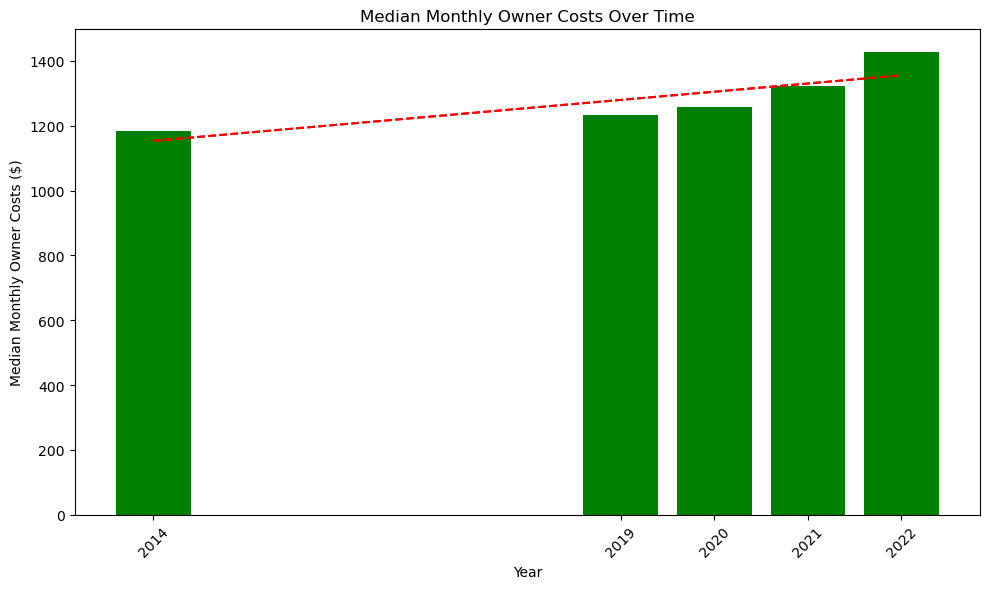

In [5]:
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(median_owner_costs_by_year.index, median_owner_costs_by_year.values, color='green')
plt.xlabel('Year')
plt.ylabel('Median Monthly Owner Costs ($)')
plt.title('Median Monthly Owner Costs Over Time')
plt.xticks(median_owner_costs_by_year.index, rotation=45)
plt.tight_layout()

# Fit a regression line
x = median_owner_costs_by_year.index
y = median_owner_costs_by_year.values
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot the regression line
plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')

# Calculate R-squared value
y_pred = trendline
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared:.4f}")

# Plot the regression line
plt.plot(x, trendline, color='red', linestyle='--', label='Trend Line')


# Save the plot as a file
plt.savefig('median_owner_cost_by_year14_22.png', format='png', dpi=300)

# Show the plot
plt.show()